In [ ]:
import pandas as pd # Pandas kütüphanesi

import seaborn as sns # Seaborn Kütüphanesi

import numpy as np # Numpy Kütüphanesi

import matplotlib.pyplot as plt # Mathplot kütüphanesi

from sklearn.model_selection import train_test_split # Veri setimizde kullanacağımız modeli eğitmek için gerekli kütüphane.

from sklearn.linear_model import LinearRegression # Veri setimizde kullanacağımız model.

from sklearn.metrics import mean_absolute_error, mean_squared_error # Kurduğumuz model ne kadar iyi olduğunu test etmek için gerekli kütüphane.

from sklearn.preprocessing import OneHotEncoder # Veri setinde değişken dönüşümü için kullalıcak kütüphane.



# -TR- Veri analizi için gerekli kütüphanelirimizi yüklüyoruz
# -EN- We are installing the necessary libraries for data analysis.

In [ ]:
df = pd.read_csv("drive/MyDrive/cars.csv")


# -TR- İnceleyeceğimiz Veri Setini konsolumuzda analiz edebilmek için bir değişkene atıyoruz.
# -EN- We are assigning the dataset we will analyze to a variable in our console.

In [ ]:
print(df.head())


   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000  


# -TR- Veri seti düzgün yüklenmişmi diye bir kontrol yapıyoruz ve veri setinde ki ilk 5 veriyi ekrana yazdırıyoruz.
# -EN- We are checking if the dataset has been loaded correctly and printing the first 5 rows of the dataset to the screen.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB
None


Veri seti, 100 satır ve 13 sütundan oluşuyor. Sütunlar ve veri tipleri şu şekilde:         

The dataset consists of 100 rows and 13 columns. The columns and their data types are as follows:

Car_ID (int64): Araba ID'si.
Brand (object): Araba markası.
Model (object): Araba modeli.
Year (int64): Üretim yılı.
Kilometers_Driven (int64): Arabanın kullanılan kilometre miktarı.
Fuel_Type (object): Yakıt tipi.
Transmission (object): Şanzıman tipi.
Owner_Type (object): Sahip tipi.
Mileage (int64): Yakıt verimliliği.
Engine (int64): Motor hacmi.
Power (int64): Güç.
Seats (int64): Koltuk sayısı.
Price (int64): Fiyat.
Gibi bir analiz yapabiliriz.
We can perform an analysis like this.

# -TR- Veri seti hakkında bilgi edinmek ve analiz edebilmek için info methodunu çağırıyoruz.
# -EN- We are calling the info method to get information about the dataset and analyze it.

In [ ]:

print(df.describe().T)

                   count        mean           std       min        25%  \
Car_ID             100.0       50.50  2.901149e+01       1.0      25.75   
Year               100.0     2018.39  1.171160e+00    2016.0    2017.75   
Kilometers_Driven  100.0    28150.00  9.121376e+03   10000.0   22000.00   
Mileage            100.0       17.21  3.309902e+00      10.0      15.00   
Engine             100.0     1855.23  6.313115e+02     999.0    1462.00   
Power              100.0      158.13  7.696814e+01      68.0     103.00   
Seats              100.0        5.23  7.501515e-01       4.0       5.00   
Price              100.0  1574000.00  1.000265e+06  450000.0  700000.00   

                         50%         75%        max  
Car_ID                  50.5       75.25      100.0  
Year                  2018.0     2019.00     2021.0  
Kilometers_Driven    27000.0    32000.00    60000.0  
Mileage                 17.0       19.00       25.0  
Engine                1774.0     2143.00     4951.0  


-TR- Araba ID'leri (Car_ID) 1 ile 100 arasındadır.
Arabaların üretim yılları (Year) 2016 ile 2021 arasında değişmektedir.
Arabaların ortalama kullanılan kilometre miktarı (Kilometers_Driven) 28,150'dir, ancak standart sapma oldukça yüksektir (9,121.38), bu da verilerin ne kadar dağılmış olduğunu gösterir.
Yakıt verimliliği (Mileage) 10 ile 25 arasında değişmektedir, ortalama yakıt verimliliği 17.21'dir.
Motor hacmi (Engine) 999 ile 4951 arasında değişmektedir, ortalama motor hacmi 1855.23'tür.
Güç (Power) 68 ile 396 arasında değişmektedir, ortalama güç 158.13'tür.
Koltuk sayısı (Seats) 4 ile 7 arasında değişmektedir, ortalama koltuk sayısı 5.23'tür.
Fiyatlar (Price) 450,000 ile 4,000,000 arasında değişmektedir, ortalama fiyat 1,574,000'dir.
-EN- Car IDs (Car_ID) range from 1 to 100.
The production years of the cars (Year) range from 2016 to 2021.
The average kilometers driven by the cars (Kilometers_Driven) is 28,150, but the standard deviation is quite high (9,121.38), indicating a wide distribution of the data.
Mileage ranges from 10 to 25, with an average mileage of 17.21.
Engine capacity (Engine) ranges from 999 to 4951, with an average engine capacity of 1855.23.
Power ranges from 68 to 396, with an average power of 158.13.
The number of seats (Seats) ranges from 4 to 7, with an average of 5.23 seats.
Prices range from 450,000 to 4,000,000, with an average price of 1,574,000.

# -TR- Veri setinde ki kolonları ve sütünları analiz edebilmek için describe methodunu çağıyoruz ve daha düzgün bir tablo çıktısı için .T methodunu kullanıyoruz.
# -EN- We are calling the describe method to analyze the columns and rows in the dataset, and we are using the .T method for a more organized table output.

In [ ]:
cat_col = [col for col in df.columns if df[col].dtypes in ["category", "object"]]
print(f"Kategorik değerler : {cat_col}")

Kategorik değerler : ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']


Kategorik değerler, Categorical variables : ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']


# -TR- Kategorik değişkenlerimizi sıralamak için  list comprehension özelliğini kullanıp veri setindeki bütün kolonları tarayıp veri türü Category veya object olanları cat_col adlı bir değişkene atıyoruz.
# -EN- We are using list comprehension to iterate through all columns in the dataset and assign those with data type 'Category' or 'object' to a variable called cat_col for sorting categorical variables.


In [ ]:
for col in cat_col:
  print(f" {col}, sınıf değerleri :{df[col].value_counts()}")

 Brand, sınıf değerleri :Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64
 Model, sınıf değerleri :Model
Mustang          3
Altroz           3
C-Class          3
Verna            3
Fortuner         2
S-Cross          2
Vitara           2
WR-V             2
Ameo             2
A3               2
7 Series         2
GLE              2
Yaris            2
Ranger           2
Santro           2
Tigor            2
T-Roc            2
BR-V             2
Elantra          2
Q7               2
X5               2
GLA              2
Camry            2
Venue            2
Tiago            2
XUV300           2
Vento            2
A5               2
3 Series         2
Innova Crysta    2
Safari           2
EcoSport         2
Aspire           2
E-Class          2
X3               2
A6               2
Passat           2
Thar             2
Cre

# -TR- Kategorik değişkenlerimizin sınıf değerlerini bulmak için bir for döngüsü yardımı ile sınıf değerlerini value_counts methodu ile ekrana yazdırıyoruz.
# -EN- We are using a for loop to iterate through the categorical variables and printing the class values to the screen using the value_counts method.


In [ ]:
num_col = [col for col in df.columns if df[col].dtypes in ["float64", "int64"]]
print(f" Sayısal değerler : {num_col}")

 Sayısal değerler : ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


Sayısal değerler,Numerical variables : ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# -TR- Sayısal değişkenlerimizi bulmak için  list comprehension yöntemi ile veri türleri Float64 veya Int64 olan değişkenleri num_col adlı değişkene atıyoruz.
# -EN- We are using list comprehension to iterate through all columns in the dataset and assign those with data type 'Float64' or 'Int64' to a variable called num_col for finding numerical variables.


In [ ]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["float64", "int64"]]
print(f"num_but_cat : {num_but_cat}")

num_but_cat : ['Year', 'Seats']


num_but_cat : ['Year', 'Seats']

-TR- Sayısal ama kardinali düşük olan değerlerimizi bulmak için list comprehension yöntemi ile değişkenlerin değerleri 10 dan küçük olanları num_but_cat adlı değişkene atıyoruz
-EN- We use list comprehension to assign the values of variables that are numerically low but cardinality is low and less than 10 to a variable named num_but_cat.

In [ ]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    print(f"Q1: {Q1}")
    # -TR- Q1 Veri setinin sıralandığında alt %25'lik dilimi temsil eder.
    # -EN- Q1 represents the bottom 25% of the data set when sorted.
    Q3 = df[column].quantile(0.75)
    print(f"Q3 : {Q3}")
    # -TR- Q3 Veri setinin sıralandığında üst %25'lik dilimi temsil eder.
    # -EN- Q3 represents the top 25% of the data set when sorted.
    IQR = Q3-Q1
    print(f"IQR : {IQR}")
    # -TR- IQR Veri setinin merkezi eğilimini ve dağılımını ölçmek için kullanılır.
    # -EN- IQR is used to measure the central tendency and spread of the data set.
    low = Q1-1.5*IQR
    print(f"low : {low}")
    # -TR- Low alt sınırı temsil eder.
    # -EN- Low represents the lower boundary.
    high = Q3+1.5*IQR
    print(f"high : {high}")
    # -TR- High üst sınırı temsil eder.
    # -EN- High represents the upper boundary.
    kosul = ((df[column] >= low) & (df[column] <= high))
    # -TR- Alt sınır ve üst sınır arasında ki değerlerimizi ayıklamak için bir kosul yazıyoruz.
    # -EN- We write a condition to filter out the values between the lower and upper boundaries.
    clear_df = df[kosul]
    # -TR- Veri setimizi aykırı değerlerden kurtarmak için bu koşulu kullanıyoruz.
    # -EN- We use this condition to remove outliers from our data set.
    return clear_df
    # -TR- Geriye temiz bir veri setini döndürerek fonsiyonumuzu bitiriyoruz.
    # -EN- Finally, we return a clean data set.


# -TR- Bir fonksiyon oluşturup bu fonksiyon içinde aykırı değer analizi gerçekleştiriyoruz.
# -EN- We are creating a function to perform outlier analysis and removing the outliers within this function.

In [ ]:
for col in num_col:
  print(col)
  df = remove_outliers(df, col)


Car_ID
Q1: 25.75
Q3 : 75.25
IQR : 49.5
low : -48.5
high : 149.5
Year
Q1: 2017.75
Q3 : 2019.0
IQR : 1.25
low : 2015.875
high : 2020.875
Kilometers_Driven
Q1: 22000.0
Q3 : 32000.0
IQR : 10000.0
low : 7000.0
high : 47000.0
Mileage
Q1: 15.0
Q3 : 19.0
IQR : 4.0
low : 9.0
high : 25.0
Engine
Q1: 1462.0
Q3 : 1998.0
IQR : 536.0
low : 658.0
high : 2802.0
Power
Q1: 98.0
Q3 : 174.0
IQR : 76.0
low : -16.0
high : 288.0
Seats
Q1: 5.0
Q3 : 5.0
IQR : 0.0
low : 5.0
high : 5.0
Price
Q1: 650000.0
Q3 : 2200000.0
IQR : 1550000.0
low : -1675000.0
high : 4525000.0


# -TR- Oluşturduğumuz aykırı değerleri temizleme fonksiyonunu, veri setimizde ki bütün sayısal değişkenlerde aykırı değerleri temizlemek için bir for döngüsü açıyoruz.
# -EN- We open a for loop to clean outliers from all numerical variables in our dataset using the outlier removal function we created.

In [ ]:
print(df.describe().T)


                   count          mean            std       min       25%  \
Car_ID              73.0  5.172603e+01      28.809846       2.0      27.0   
Year                73.0  2.018479e+03       1.167971    2016.0    2018.0   
Kilometers_Driven   73.0  2.697260e+04    7516.597566   15000.0   22000.0   
Mileage             73.0  1.826027e+01       2.896489      12.0      17.0   
Engine              73.0  1.613082e+03     371.237336     999.0    1248.0   
Power               73.0  1.356164e+02      50.159366      68.0      98.0   
Seats               73.0  5.000000e+00       0.000000       5.0       5.0   
Price               73.0  1.380822e+06  903873.997832  450000.0  650000.0   

                        50%        75%        max  
Car_ID                 53.0       75.0      100.0  
Year                 2019.0     2019.0     2020.0  
Kilometers_Driven   26000.0    32000.0    42000.0  
Mileage                18.0       20.0       25.0  
Engine               1498.0     1968.0     248

# -TR- Yaptığımız işlemler doğru sonuç alabildikmi diye veri setimizi incelemek için describe methodunu çağırıyoruz ve ekrana yazdırıyoruz.
# -EN- We call the `describe` method to examine our dataset and print it to the screen to see if our operations yielded correct results.


In [ ]:
print(df.isnull().sum())


Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# -TR- Veri setimizde ki değişkenlerde boş değer alan bir değişken var mı diye kontrol etmek için .isnull() methodunu kullanıyoruz ve kaç tane boşluk olduğunu bulmak için .sum() meyhodunu kullanıyoruz.
# -EN- To check if there are any missing values in our dataset, we use the `.isnull()` method, and to find out how many missing values there are, we use the `.sum()` method.


In [ ]:
for col in num_col:
  if df[col].isnull().any():
    df[col].fillna(df[col].mean(), inplace=True)
    print("Boşluk temizlendi")

# -TR- Boşluk analizimizi yaptıktan sonra bir for döngüsü ile boş değer alan değişkenlerimizi ortalama değerler ile dolduruyoruz ve veri setinde ki boşlukları temizliyoruz.
# -EN- After conducting our missing value analysis, we fill the missing values in our variables with the mean values using a for loop and clean the missing values in the dataset.


In [ ]:
print(df.isnull().sum())


Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# -TR- Yaptığımız işlemden doğru sonuç alabildikmi diye tekrar boşluk analizi yapıyoruz.
# -EN- We conduct another missing value analysis to verify if our operations yielded correct results.


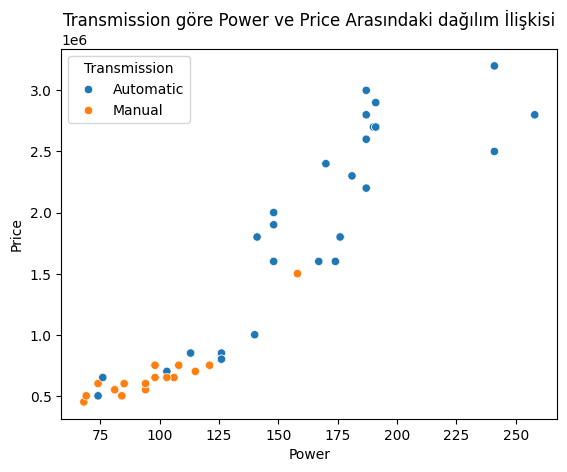

In [ ]:
sns.scatterplot(x='Power', y='Price', hue='Transmission', data=df) # x düzleminde (yatay) Power(Motor Gücü) değişkenini ele alıyoruz, y düzleminde (dikey) Price (Fiyat) değikenini ele alıyoruz ve Hue kullanarak burdaki araçları Transmission (Vites türü) Özelliğine göre karşılaştırma yapıyoruz.
plt.title('Transmission göre Power ve Price Arasındaki dağılım İlişkisi')
plt.show()

-TR- (Power) olarak max 250+ bir değerimiz var (fiyat) olarak max 3.000.000+ bir değermiz var ve burda gördüğümüz üzere araç fiyatı arttıkça motor gücü doğru orantılı bir şekilde yükselmektedir ve (vites türünün) otomatik tercih edildiği analizini yapabiliriz.
-EN- Based on the analysis, we can observe that there is a car with a power (Power) value of over 250 and a price (Price) value of over 3,000,000. Additionally, it seems that as the price of the car increases, the engine power also increases proportionally. Furthermore, there is a preference for automatic transmission (Transmission) type.

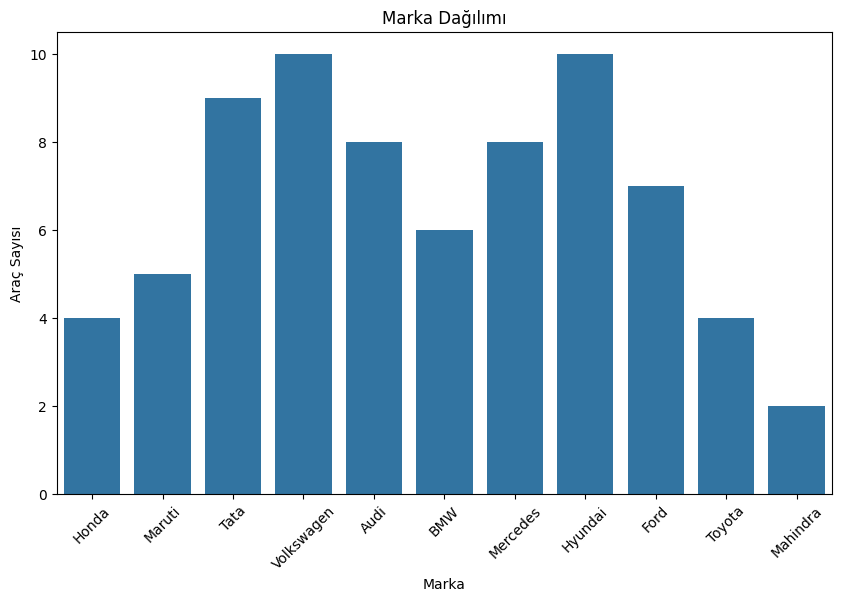

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=df)
plt.title('Marka Dağılımı')
plt.xlabel('Marka')
plt.ylabel('Araç Sayısı')
plt.xticks(rotation=45)
plt.show()

-TR- Veri setinde bulunan markalara göre araç sayılarını incelersek Hyundai ve Volkswagen markasında en çok araç sayısını görüyoruz, Mahindra model araç sayısı da en az olduğununun analizini yapabiliriz.
-EN- If we analyze the number of vehicles according to the brands in the dataset, we see that Hyundai and Volkswagen have the highest number of vehicles, while Mahindra has the lowest number of vehicles.

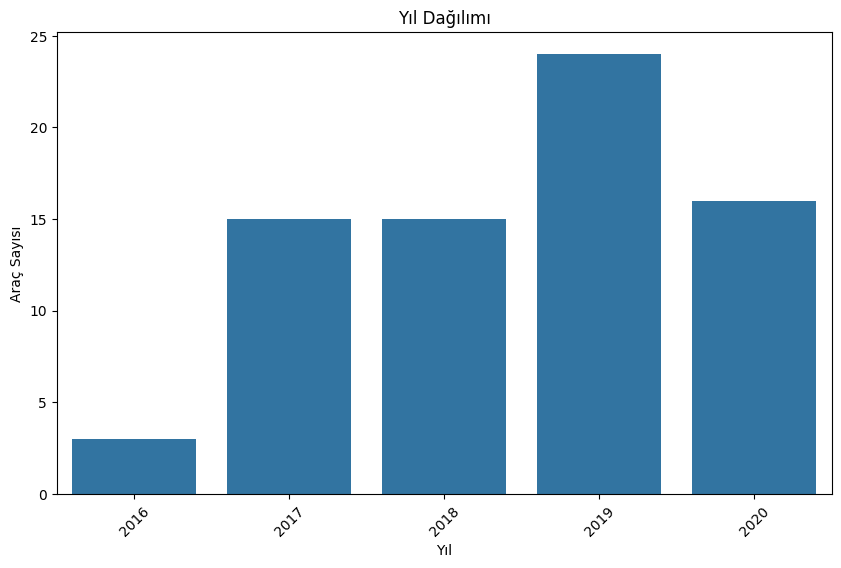

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Yıl Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Araç Sayısı')
plt.xticks(rotation=45)
plt.show()

-TR- Yıllara göre veri setine eklenen araç sayını karşılaştırdık ve en çok araç sayısını 2019 değerinde 20+ olarak analiz yapabiliriz en az araç sayısı 2016 yıllarında kaydedilmiş.
-EN- We compared the number of vehicles added to the dataset by years and analyzed that the highest number of vehicles was recorded in 2019 with a value of 20+, while the lowest number of vehicles was recorded in 2016.

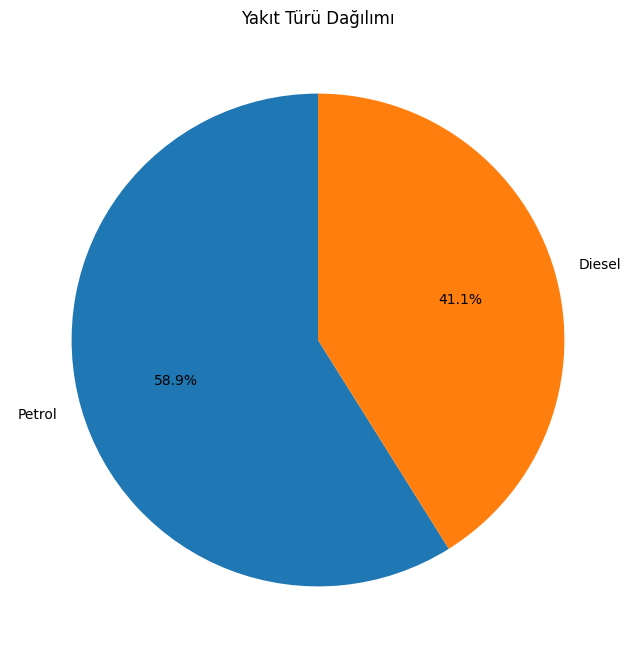

In [ ]:
plt.figure(figsize=(8, 8))
df['Fuel_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Yakıt Türü Dağılımı')
plt.ylabel('')
plt.show()


-TR- Veri setimizde bulunan araç sayısına göre yakıt türlerini karşılaştırdık ve sonuç olarak neredeyse yarı yarıya bir sonuç aldığımızı görebiliriz.
-EN- We compared the fuel types based on the number of vehicles in the dataset and found that the results are almost evenly distributed, with nearly equal numbers for each fuel type.

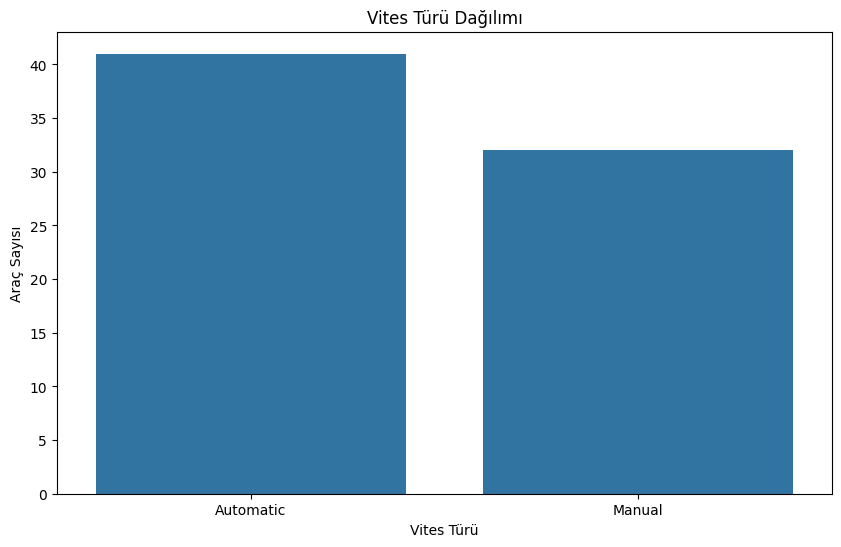

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Vites Türü Dağılımı')
plt.xlabel('Vites Türü')
plt.ylabel('Araç Sayısı')
plt.show()

-TR- Araç sayısına göre vites türünün dağılımını inceledik ve sonuç olarak otomatik vitesi olan araçların daha fazla olduğunu analiz edebiliriz.
-EN-
We examined the distribution of transmission types based on the number of vehicles, and as a result, we can analyze that there are more vehicles with automatic transmission.

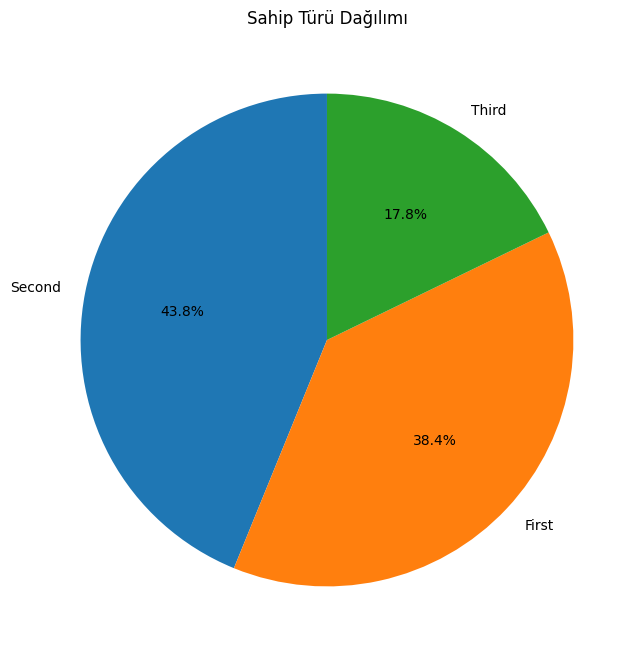

In [ ]:
plt.figure(figsize=(8, 8))
df['Owner_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sahip Türü Dağılımı')
plt.ylabel('')
plt.show()

-TR- Veri setinde bulunan araçların kaçıncı el olduğunun pasta grafiğinde inceledik ve genel olarak 2. el araç sayısının daha fazla olduğunun analizini yapabilirz.
-EN- We analyzed the distribution of the number of vehicles based on their ownership type in a pie chart, and we can generally conclude that there are more used (2nd hand) vehicles in the dataset.

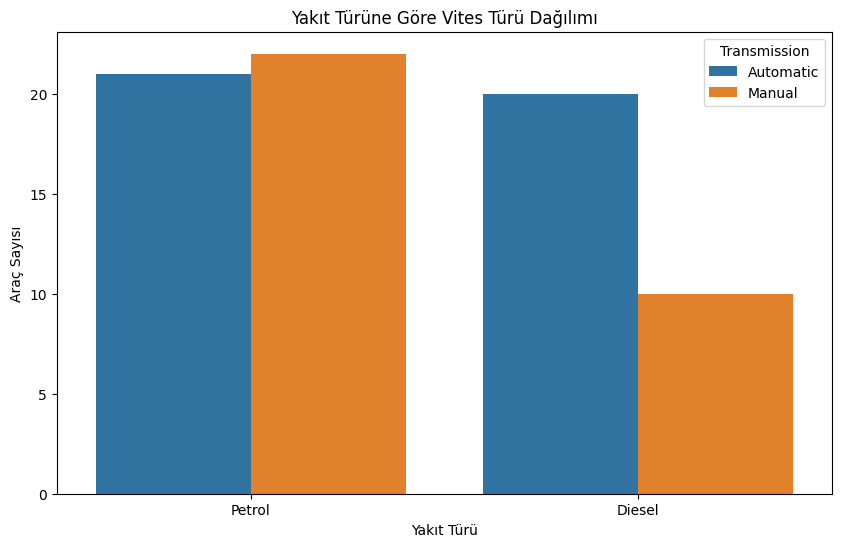

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', hue='Transmission', data=df)
plt.title('Yakıt Türüne Göre Vites Türü Dağılımı')
plt.xlabel('Yakıt Türü')
plt.ylabel('Araç Sayısı')
plt.show()

-TR- Yakıt türüne göre vites türünü karşılaştırdık ve yakıt türü petrol olan araçların düz vites olduğunu, yakıt tüzü dizel olan araçların otomatik vites olduğunun analizini yapabiliriz.
-EN- We compared the transmission types based on the fuel types, and we can analyze that vehicles with petrol fuel type mostly have manual transmission, while vehicles with diesel fuel type mostly have automatic transmission.

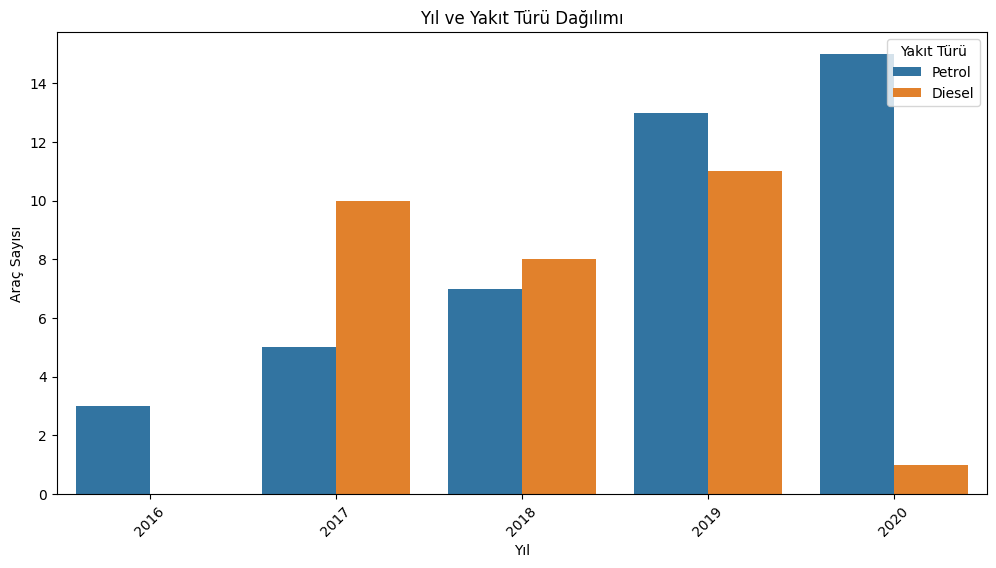

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Fuel_Type', data=df)
plt.title('Yıl ve Yakıt Türü Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Araç Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Yakıt Türü', loc='upper right')
plt.show()

-TR- Yıla göre yakıt türünü karşılaştırdık ve 2016 yılında hiç dizel araç bulunmamakta ve 2017 yılında benzin kullanan araç sayısına göre dizel araçlar daha artışta fakat sonrasında bir azalım, son bir yükseliş sonrasında tamamen benzinli araçlara geri dönüldüğü analizi yapılabilir.
-EN- We compared the fuel types by year and analyzed that there were no diesel vehicles in 2016. In 2017, there was an increase in the number of diesel vehicles compared to petrol vehicles, but then there was a decrease. After a final increase, there was a complete return to petrol vehicles.

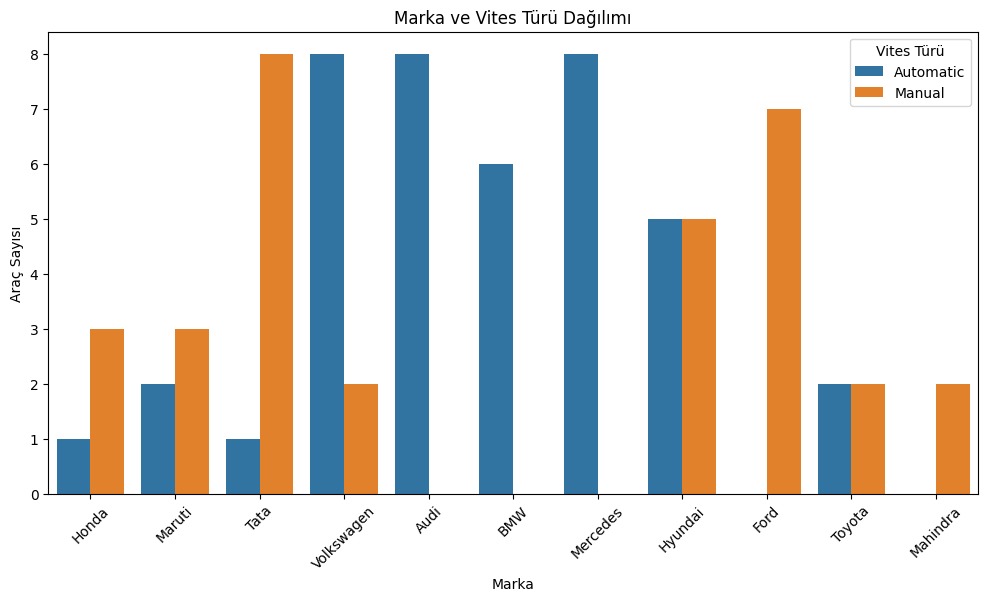

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', hue='Transmission', data=df)
plt.title('Marka ve Vites Türü Dağılımı')
plt.xlabel('Marka')
plt.ylabel('Araç Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Vites Türü', loc='upper right')
plt.show()

-TR- Bu veri setinde 2016 ve 2020 yılları arasında Audi, BMW, Mercedes markasında hiç vites türü manuel olan araç bulunmamakta ve Ford, Mahindra markasında vites türü otomatik olan araç bulunmamakta.
Tata markasında vites türü manuel olan araçların en fazla olduğunu görüyoruz ve otomatik vites türünde ki araç sayısı da en fazla Volkswagen, Audi, Mercedes markalarında oldğunun analizini yapabiliriz.

-EN- In this dataset, between 2016 and 2020, there are no vehicles with manual transmission in the Audi, BMW, and Mercedes brands, and no vehicles with automatic transmission in the Ford and Mahindra brands.
We observe that Tata has the highest number of vehicles with manual transmission, while Volkswagen, Audi, and Mercedes have the highest number of vehicles with automatic transmission.

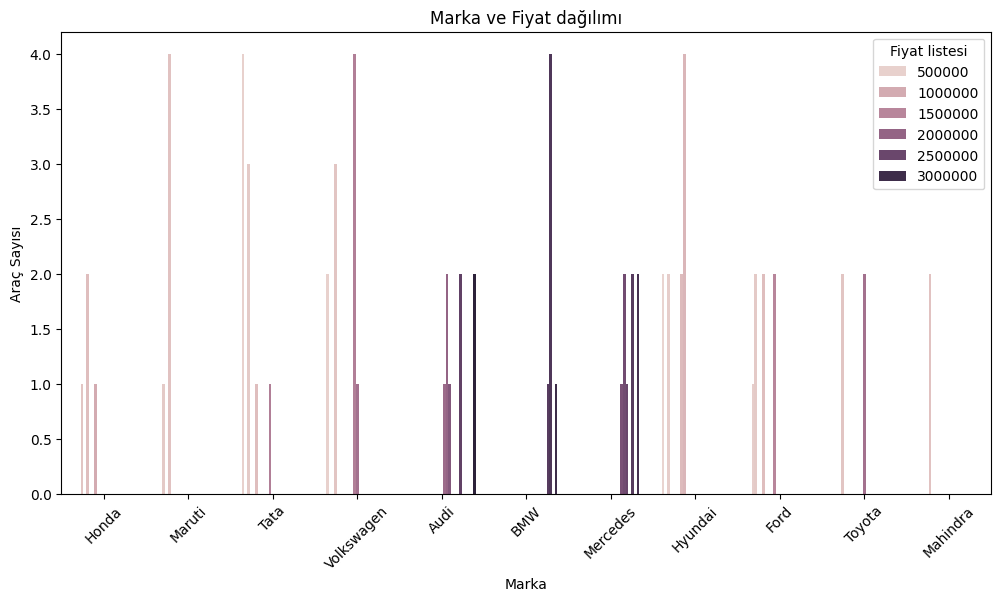

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', hue='Price', data=df)
plt.title('Marka ve Fiyat dağılımı')
plt.xlabel('Marka')
plt.ylabel('Araç Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Fiyat listesi', loc='upper right')
plt.show()

-TR- Bu analizimizde fiyat ve markaları karşılaştırdık ve en pahalı araçların BMW modelinde olduğunu, en ucuz araçların Mahindra, Maruti modellerinde olduğunun analizini yapabiliriz.
-EN- In this analysis, we compared prices with brands and concluded that the most expensive vehicles are in the BMW model, while the cheapest vehicles are in the Mahindra and Maruti models.

In [ ]:
models = df['Model'].unique()
# Her bir model için benzersiz bir sayı atayacak bir sözlük oluşturun
model_map = {model: i for i, model in enumerate(models)}
# Model sütununu sayısal türe dönüştürün
df['Model'] = df['Model'].map(model_map)

In [ ]:
brands = df['Brand'].unique()
brand_map = {brand: i for i, brand in enumerate(brands)}
# Brand sütununu sayısal türe dönüştür
df['Brand'] = df['Brand'].map(brand_map)

In [ ]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1}) # yakıt türünü int değerlere dönüştürdük
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
df['Owner_Type'] = df['Owner_Type'].map({'First': 0, 'Second': 1, 'Third': 2})

In [ ]:

X = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand','Model']] #BAĞIMSIZ DEĞİŞKENLER

y = df['Price'] #BAĞIMLI DEĞİŞKENLER

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # MODELİMİZDE KULLANACAĞIMIZ EĞİTİM VE TEST DEĞERLERİMİZİ TANIMLADIK

In [ ]:
print(X_train.shape)
print(X_test.shape)

(58, 11)
(15, 11)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train) #FİT() METHODU SAYESİNDE MODELİMİZDE VERİ SETİNİ ÖĞRETTİK

LinearRegression()

In [ ]:
y_pred = model.predict(X_test) #VE MODELDEN BİR TAHMİNDE BULUNMASINI İSTEDİK

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)

print(f"Ortalama Mutlak Hata : {MAE}")

Ortalama Mutlak Hata : 276735.84383043397


In [ ]:
MSE = mean_squared_error(y_test, y_pred)

print(f"Ortalama Kare Hata : {MSE}")

Ortalama Kare Hata : 110547144655.49069


In [ ]:
RMSE = np.sqrt(MSE)

print(f"Kök Ortalama Kare Hata : {RMSE}")

Kök Ortalama Kare Hata : 332486.3074706847


In [ ]:
print("Tahmin Sonuçları:")
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

Tahmin Sonuçları:
     Actual     Predicted
8   2200000  2.367836e+06
89   550000  3.868534e+05
26  3200000  2.981689e+06
1   1000000  1.503816e+06
40  1500000  1.828165e+06
99   600000  5.867121e+05
16  1800000  1.791424e+06
49  1800000  1.571984e+06
18  3000000  2.391514e+06
77   650000  8.891713e+05
91   700000  1.054986e+06
43   700000  9.903395e+05
15   650000  6.237287e+05
63  1600000  2.138442e+06
9   2700000  2.237813e+06


In [ ]:
results = pd.DataFrame({
    'Actual': [2200000, 550000, 3200000, 1000000, 1500000, 600000, 1800000, 1800000, 3000000, 650000, 700000, 700000, 650000, 1600000, 2700000],
    'Predicted': [2.367836e+06, 3.868534e+05, 2.981689e+06, 1.503816e+06, 1.828165e+06, 5.867121e+05, 1.791424e+06, 1.571984e+06, 2.391514e+06, 8.891713e+05, 1.054986e+06, 9.903395e+05, 6.237287e+05, 2.138442e+06, 2.237813e+06]
})

# Sonuçları göster
print("Tahmin Sonuçları:")
print(results.to_string(index=False))

Tahmin Sonuçları:
 Actual  Predicted
2200000  2367836.0
 550000   386853.4
3200000  2981689.0
1000000  1503816.0
1500000  1828165.0
 600000   586712.1
1800000  1791424.0
1800000  1571984.0
3000000  2391514.0
 650000   889171.3
 700000  1054986.0
 700000   990339.5
 650000   623728.7
1600000  2138442.0
2700000  2237813.0


In [ ]:
new_data = pd.DataFrame({
    'Year': [2019],
    'Kilometers_Driven': [50000],
    'Mileage': [15],
    'Engine': [1500],
    'Power': [120],
    'Seats': [5],
    'Fuel_Type': [0],
    'Transmission': [0],
    'Owner_Type': [0],
    'Brand': [1],
    'Model': [2]
})

prediction = model.predict(new_data)
print("Tahmin edilen fiyat:", prediction)

Tahmin edilen fiyat: [1216599.83848263]


-TR- SON OLARAK MODELİMİZİN İYİ BİR MODEL OLDUĞUNU AKTARABİLİRİZ ÇÜNKÜ FİYAT DEĞİŞKENİNİ TAHMİN ETMEYE ÇALIŞTIĞIMIZ İÇİN BAŞLANGIÇTA MODELİN HATA DEĞERLERİ ÇOK YÜKSEK GİBİ GÖZÜKEBİLİR FAKAT GAYET İYİ TAHMİNLERDE ÇOK UFAK SAPMALARDA BULUNUYOR.
-EN- Lastly, we can convey that our model is a good model because we are trying to predict the price variable, so initially, the model's error values may appear to be very high. However, it makes very good predictions with very small deviations.